## ver1 purpose
- 지도학습 데이터 labeled_data 전처리
  - 종속변수와 상관관계 높은 변수 선정하여 outlier 및 null 값 제거(다 확인 힘드니) (완료)
  - 데이터 값이 이상한 변수 삭제 (완료)
  - 종속변수 label 숫자로 변환 (완료)

# 1. 데이터 불러오기

## 1.1 디렉토리 설정 및 데이터 로드

In [169]:
import os
import pandas as pd


#디렉토리 설정
os.chdir('/content/drive/MyDrive/Data/dataset')

#labeled_data 로드
labeled_data = pd.read_csv('labeled_data.csv')

#moldset_labeled data 로드 (moldset_labeled.csv)
moldset_labeled_data = pd.read_csv('moldset_labeled.csv')

#unlabeled data 로드(unlabeled_data.csv)
unlabeled_data = pd.read_csv('unlabeled_data.csv')

In [170]:
#데이터 확인

labeled_data
moldset_labeled_data
unlabeled_data
print('labeled_data length : {}개'.format(labeled_data.shape[0]))
print('moldset_labeled_data length : {}개'.format(moldset_labeled_data.shape[0]))
print('unlabeled_data length : {}개'.format(unlabeled_data.shape[0]))

labeled_data length : 7996개
moldset_labeled_data length : 2607개
unlabeled_data length : 795315개


# 2. 데이터 변수 제거(labeled_data)

In [171]:
#labeled Data info 확인
#변수 null값 및 data type 확인

labeled_data.T

,0,1,2,3,4,5,6,7,8,9,...,7986,7987,7988,7989,7990,7991,7992,7993,7994,7995
_id,5f8928bb9c0189cc666ef19b,5f8928de9c0189cc666ef20b,5f8928df9c0189cc666ef213,5f8928f39c0189cc666ef25e,5f8928f59c0189cc666ef265,5f89294b9c0189cc666ef5b9,5f89294c9c0189cc666ef5d6,5f8929989c0189cc666ef872,5f8929999c0189cc666ef87d,5f8929a89c0189cc666ef8fe,...,5fa111cd9c0189cc66daaffe,5fa111ce9c0189cc66dab00f,5fa112129c0189cc66dab52d,5fa112149c0189cc66dab536,5fa112849c0189cc66dabe20,5fa112859c0189cc66dabe34,5fa112869c0189cc66dabe42,5fa112879c0189cc66dabe50,5fa112bb9c0189cc66dac22a,5fa112bc9c0189cc66dac23a
TimeStamp,2020-10-16 04:57:47,2020-10-16 04:58:48,2020-10-16 04:58:48,2020-10-16 04:59:48,2020-10-16 04:59:48,2020-10-16 05:00:46,2020-10-16 05:00:46,2020-10-16 05:01:46,2020-10-16 05:01:46,2020-10-16 05:02:46,...,2020-11-03 08:15:38,2020-11-03 08:15:38,2020-11-03 08:16:38,2020-11-03 08:16:38,2020-11-03 08:17:36,2020-11-03 08:17:36,2020-11-03 08:18:37,2020-11-03 08:18:37,2020-11-03 08:19:35,2020-11-03 08:19:35
PART_FACT_PLAN_DATE,2020-10-16 오전 12:00:00,2020-10-16 오전 12:00:00,2020-10-16 오전 12:00:00,2020-10-16 오전 12:00:00,2020-10-16 오전 12:00:00,2020-10-16 오전 12:00:00,2020-10-16 오전 12:00:00,2020-10-16 오전 12:00:00,2020-10-16 오전 12:00:00,2020-10-16 오전 12:00:00,...,2020-11-03 오전 12:00:00,2020-11-03 오전 12:00:00,2020-11-03 오전 12:00:00,2020-11-03 오전 12:00:00,2020-11-03 오전 12:00:00,2020-11-03 오전 12:00:00,2020-11-03 오전 12:00:00,2020-11-03 오전 12:00:00,2020-11-03 오전 12:00:00,2020-11-03 오전 12:00:00
PART_FACT_SERIAL,24,24,23,23,24,24,23,24,23,24,...,7,6,7,6,7,6,7,6,6,7
PART_NAME,CN7 W/S SIDE MLD'G RH,CN7 W/S SIDE MLD'G RH,CN7 W/S SIDE MLD'G LH,CN7 W/S SIDE MLD'G LH,CN7 W/S SIDE MLD'G RH,CN7 W/S SIDE MLD'G RH,CN7 W/S SIDE MLD'G LH,CN7 W/S SIDE MLD'G RH,CN7 W/S SIDE MLD'G LH,CN7 W/S SIDE MLD'G RH,...,CN7 W/S SIDE MLD'G RH,CN7 W/S SIDE MLD'G LH,CN7 W/S SIDE MLD'G RH,CN7 W/S SIDE MLD'G LH,CN7 W/S SIDE MLD'G RH,CN7 W/S SIDE MLD'G LH,CN7 W/S SIDE MLD'G RH,CN7 W/S SIDE MLD'G LH,CN7 W/S SIDE MLD'G LH,CN7 W/S SIDE MLD'G RH
EQUIP_CD,S14,S14,S14,S14,S14,S14,S14,S14,S14,S14,...,S14,S14,S14,S14,S14,S14,S14,S14,S14,S14
EQUIP_NAME,650톤-우진2호기,650톤-우진2호기,650톤-우진2호기,650톤-우진2호기,650톤-우진2호기,650톤-우진2호기,650톤-우진2호기,650톤-우진2호기,650톤-우진2호기,650톤-우진2호기,...,650톤-우진2호기,650톤-우진2호기,650톤-우진2호기,650톤-우진2호기,650톤-우진2호기,650톤-우진2호기,650톤-우진2호기,650톤-우진2호기,650톤-우진2호기,650톤-우진2호기
PassOrFail,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
Reason,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Injection_Time,9.59,9.6,9.6,9.59,9.59,9.58,9.58,9.58,9.58,9.57,...,9.58,9.58,9.6,9.6,9.6,9.6,9.6,9.6,9.6,9.6


In [172]:
#PART_NAME => 제품의 이름
#EQUIP_CD => unlabeled_data => 생산한 사출기 호기
#EQUIP_NAME => 생산한 사출기 이름

labeled_data['PART_NAME'].value_counts() #cn7 ~ rg3 데이터 사용
labeled_data['PART_NAME'].value_counts()

CN7 W/S SIDE MLD'G RH        3371
CN7 W/S SIDE MLD'G LH        3365
RG3 MOLD'G W/SHLD, LH         628
RG3 MOLD'G W/SHLD, RH         628
SP2 CVR ROOF RACK CTR, RH       2
JX1 W/S SIDE MLD'G RH           2
Name: PART_NAME, dtype: int64

In [173]:
labeled_data['EQUIP_NAME'].value_counts() #650톤 -우진2호기만 사용

650톤-우진2호기    7992
1800TON-우진       2
650톤-우진          2
Name: EQUIP_NAME, dtype: int64

In [174]:
labeled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _id                       7996 non-null   object 
 1   TimeStamp                 7996 non-null   object 
 2   PART_FACT_PLAN_DATE       7996 non-null   object 
 3   PART_FACT_SERIAL          7996 non-null   int64  
 4   PART_NAME                 7996 non-null   object 
 5   EQUIP_CD                  7996 non-null   object 
 6   EQUIP_NAME                7996 non-null   object 
 7   PassOrFail                7996 non-null   object 
 8   Reason                    7996 non-null   object 
 9   Injection_Time            7996 non-null   float64
 10  Filling_Time              7996 non-null   float64
 11  Plasticizing_Time         7996 non-null   float64
 12  Cycle_Time                7996 non-null   float64
 13  Clamp_Close_Time          7996 non-null   float64
 14  Cushion_

In [175]:
#사출기 이름 : 650톤 -우진2호기, => 사출기 이름
#PART_NAME : 
#CN7 W/S SIDE MLD'G RH, CN7 W/S SIDE MLD'G LH, RG3 MOLD'G W/SHLD, LH,RG3 MOLD'G W/SHLD, RH => 제품의 이름

equip_ = '650톤-우진2호기'
labeled_data = labeled_data[labeled_data['EQUIP_NAME'] == equip_]



In [176]:
labeled_data.drop(['_id','TimeStamp','PART_FACT_PLAN_DATE','PART_FACT_SERIAL','EQUIP_CD','EQUIP_NAME','Reason',
                   'Mold_Temperature_1','Mold_Temperature_2','Mold_Temperature_5','Mold_Temperature_6','Mold_Temperature_7',
                   'Mold_Temperature_8','Mold_Temperature_9','Mold_Temperature_10','Mold_Temperature_11','Mold_Temperature_12','Switch_Over_Position',
                   'Barrel_Temperature_7'],
                  axis = 1, inplace = True)

In [177]:
product_ = ["CN7 W/S SIDE MLD'G RH","CN7 W/S SIDE MLD'G LH","RG3 MOLD'G W/SHLD, LH","RG3 MOLD'G W/SHLD, RH"]

labeled_data_cn7rh = labeled_data[labeled_data['PART_NAME'] == product_[0]]
labeled_data_cn7lh = labeled_data[labeled_data['PART_NAME'] == product_[1]]
labeled_data_rg3lh = labeled_data[labeled_data['PART_NAME'] == product_[2]]
labeled_data_rg3rh = labeled_data[labeled_data['PART_NAME'] == product_[3]]

In [178]:
labeled_data_cn7rh.drop(['PART_NAME'], axis = 1, inplace = True)
labeled_data_cn7lh.drop(['PART_NAME'], axis = 1, inplace = True)
labeled_data_rg3lh.drop(['PART_NAME'], axis = 1, inplace = True)
labeled_data_rg3rh.drop(['PART_NAME'], axis = 1, inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [179]:
cn7_labeled = pd.concat([labeled_data_cn7rh,labeled_data_cn7lh], ignore_index = True) #cn7 제품
rg3_labeled = pd.concat([labeled_data_rg3lh,labeled_data_rg3rh], ignore_index = True) #rg3 제품

# 3. 데이터 NUll 값 및 outlier 제거

## 3.1 종속 변수와 상관관계가 높은 변수 선정

In [180]:
#PassOrFail : 양품 or 정상
#양품(y) -> 0
#불량(n) -> 1

labeled_data['PassOrFail'].unique()
cn7_labeled['PassOrFail'].replace({'Y':0,'N' : 1}, inplace = True)
rg3_labeled['PassOrFail'].replace({'Y':0,'N' : 1}, inplace = True)


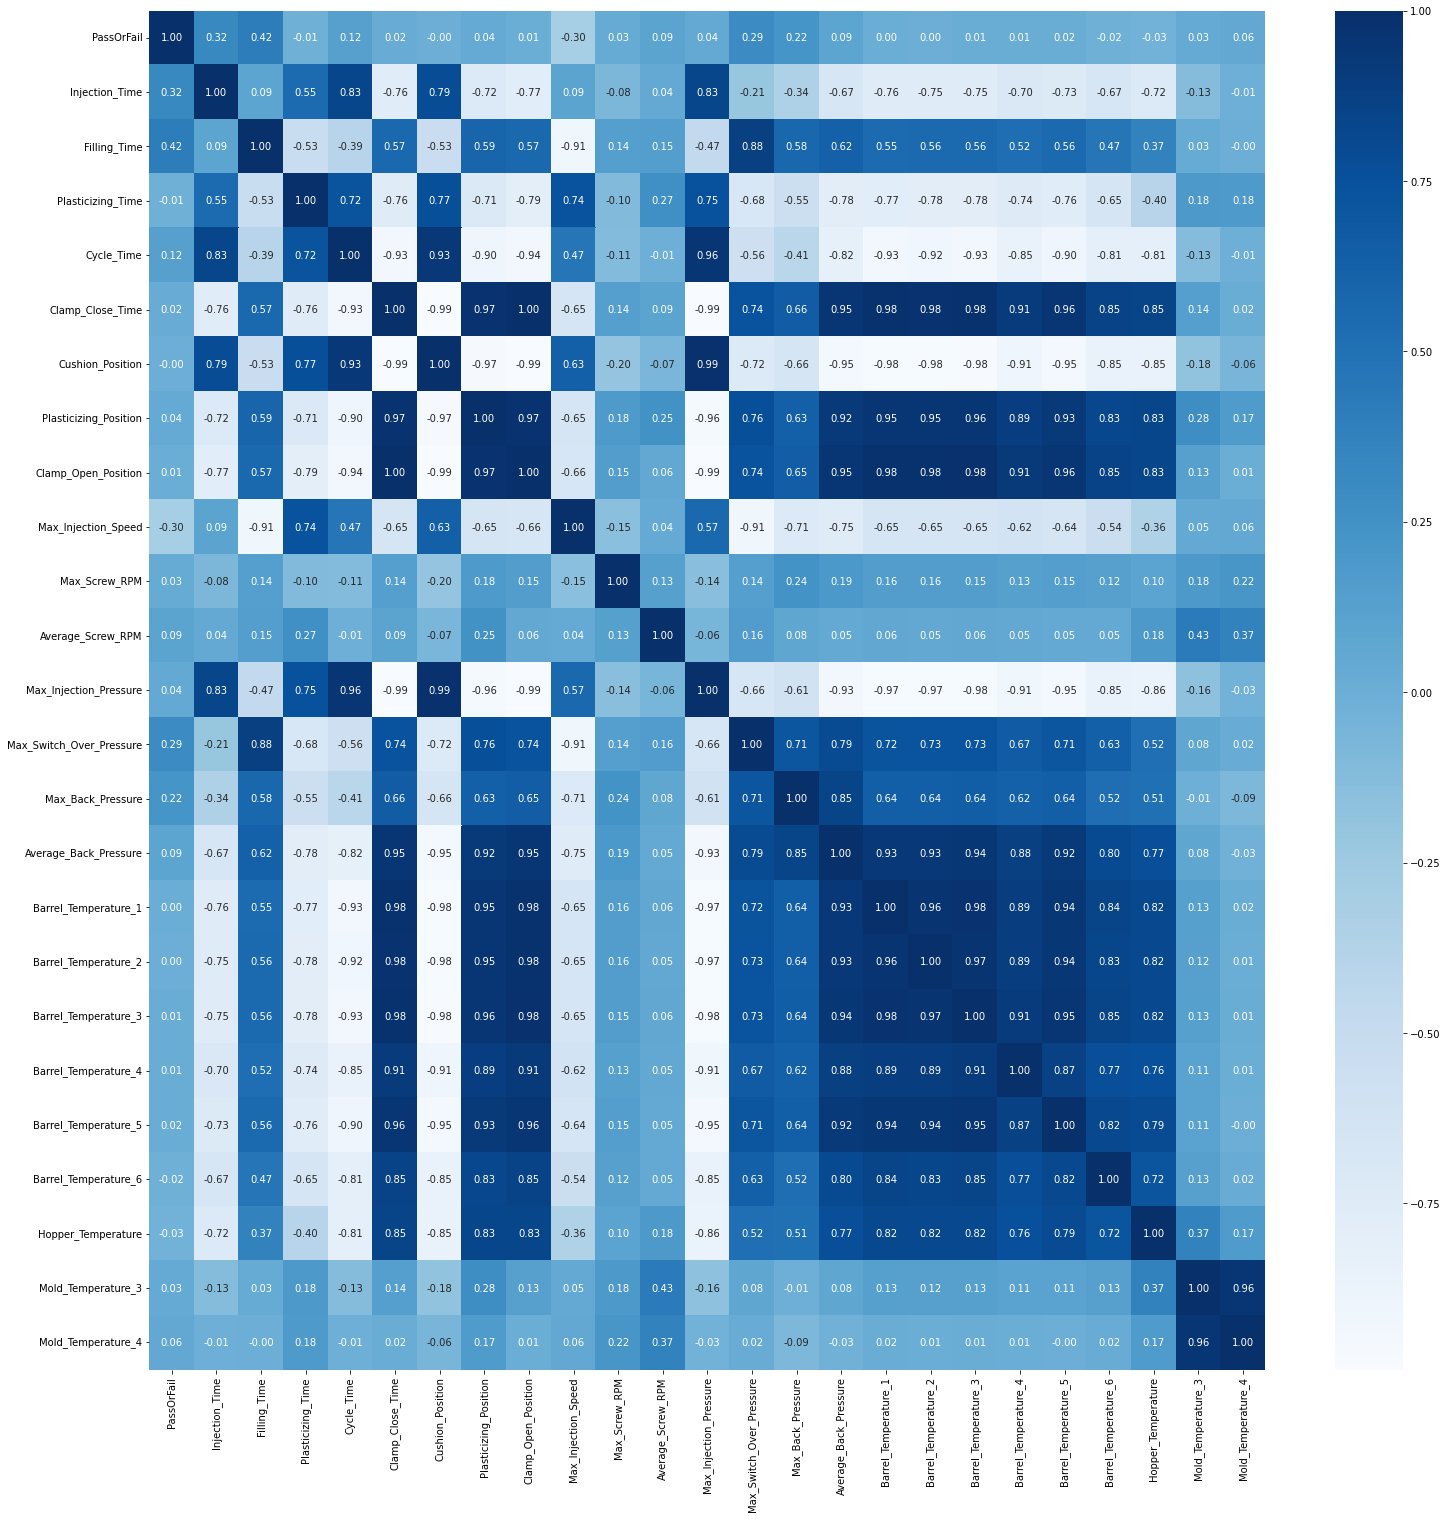

In [181]:
#cn7 제품 features 들간의 상관관계
#대략 확인한 종속변수와 관계가 깊은 변수 Filling_Time, Injection_Time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (25,25))
sns.heatmap(cn7_labeled.corr(), annot = True, fmt = '.2f', cmap = 'Blues')


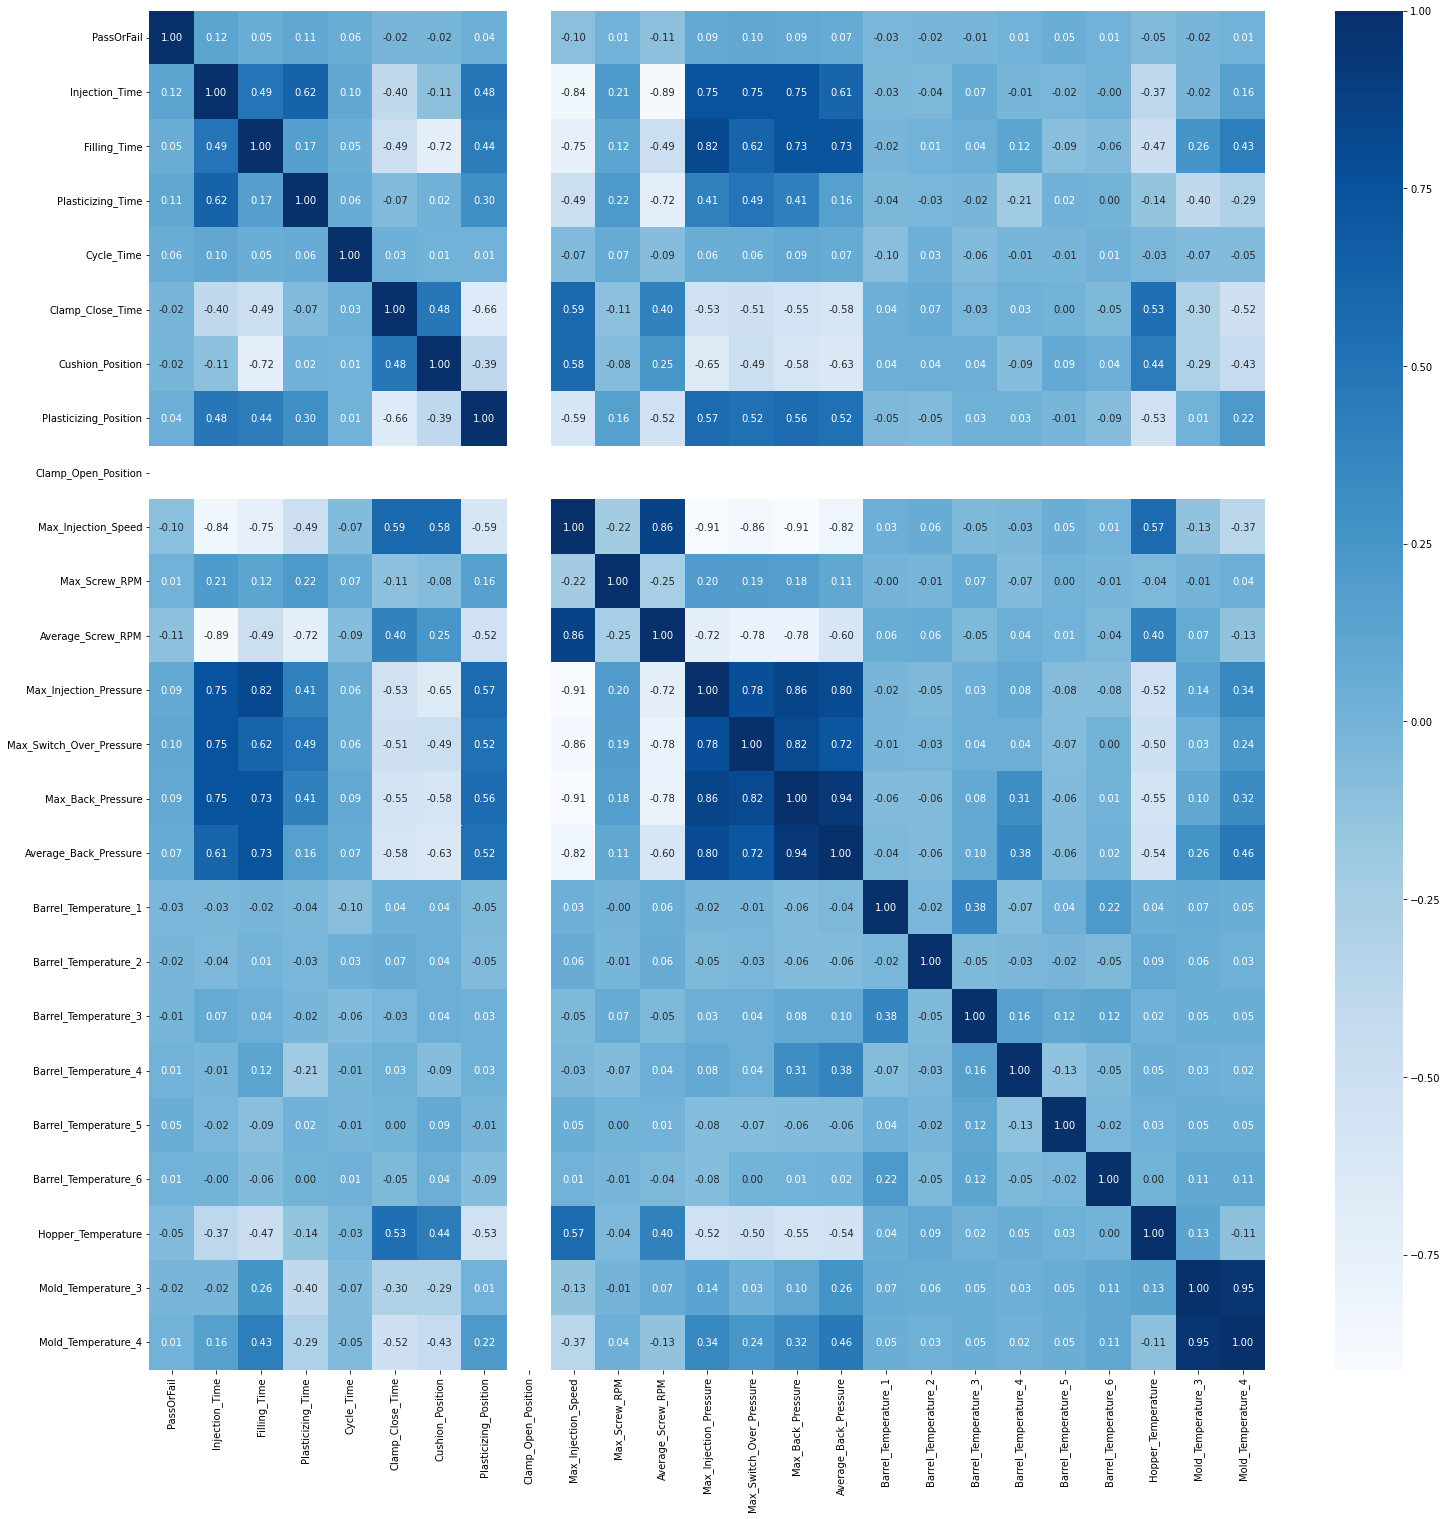

In [189]:
#rg3 제품 features 들간의 상관관계
#딱히 종속변수에 높아보이는 변수 존재 x
plt.figure(figsize = (25,25))
sns.heatmap(rg3_labeled.corr(), annot = True, fmt = '.2f', cmap = 'Blues')


## 3.2 종속 변수와 상관 관계 높은(그나마) 변수 outlier 확인

{'boxes': [<matplotlib.lines.Line2D at 0x7f8562903090>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8562924590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f85628cda90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f85628cd550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8562924b10>,
  <matplotlib.lines.Line2D at 0x7f8562924f10>]}

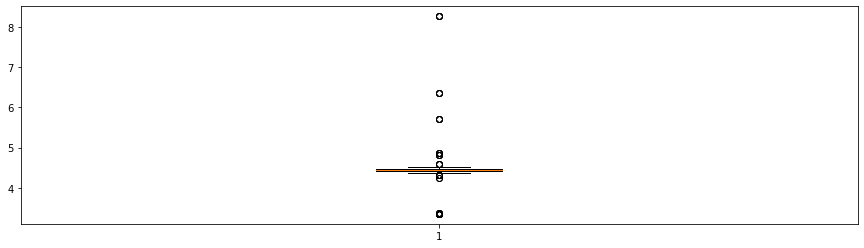

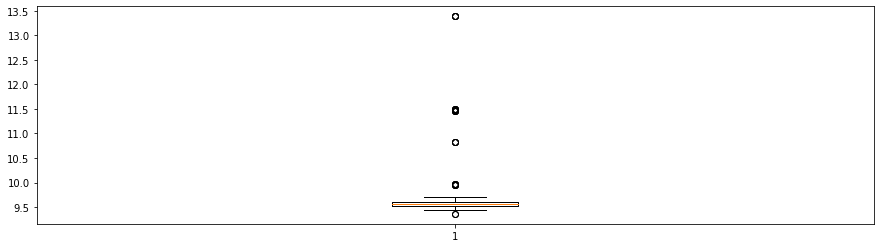

In [204]:
plt.figure(figsize = (15,4))
plt.boxplot(cn7_labeled['Filling_Time'])
plt.figure(figsize = (15,4))
plt.boxplot(cn7_labeled['Injection_Time'])


In [202]:
import numpy as np

def outlier_iqr(data):
  q1, q3 = np.percentile(data, [25,75])

  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)

  return np.where((data > upper_bound) | (data < lower_bound))


In [205]:
ch7_filling_time_outlier_idx = outlier_iqr(cn7_labeled['Filling_Time'])[0]
ch7_injection_time_outlier_idx = outlier_iqr(cn7_labeled['Injection_Time'])[0]


In [ ]:
#이상치 제외하고 평균 값 측정 후, 이상치 값들을 평균 값으로 대체

#Filling time
cn7_labeled.drop(ch7_filling_time_outlier_idx, axis = 0)['Filling_Time'].mean()
cn7_labeled.loc[ch7_filling_time_outlier_idx, 'Filling_Time'] = 4.45

#Injection time
cn7_labeled.drop(ch7_injection_time_outlier_idx, axis = 0)['Injection_Time'].mean()
cn7_labeled.loc[ch7_injection_time_outlier_idx, 'Injection_Time'] = 9.56

{'boxes': [<matplotlib.lines.Line2D at 0x7f8562153490>],
 'caps': [<matplotlib.lines.Line2D at 0x7f85621594d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f856215f510>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8562159f90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8562153a10>,
  <matplotlib.lines.Line2D at 0x7f8562153f50>]}

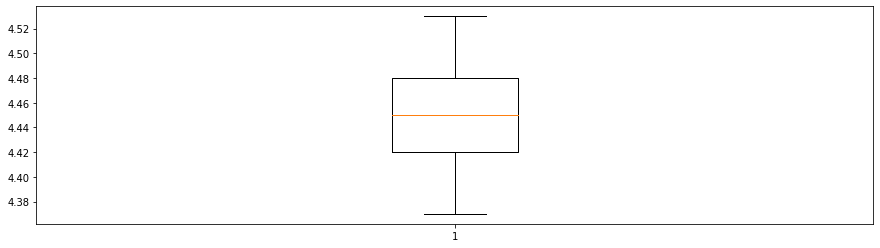

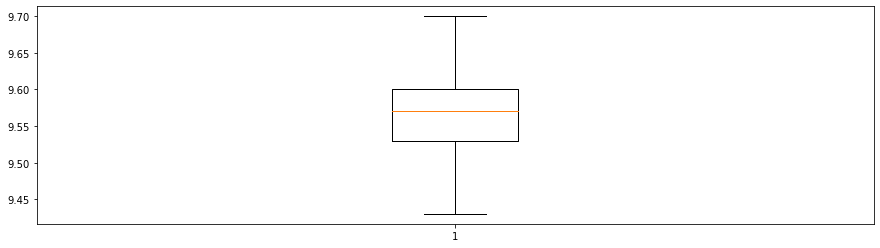

In [217]:
#이상치 제거 후 boxplot 확인

plt.figure(figsize = (15,4))
plt.boxplot(cn7_labeled['Filling_Time'])
plt.figure(figsize = (15,4))
plt.boxplot(cn7_labeled['Injection_Time'])


## 3.3 NULL 값 확인

In [190]:
#cn7_labeled null 값 확인

cn7_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6736 entries, 0 to 6735
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassOrFail                6736 non-null   int64  
 1   Injection_Time            6736 non-null   float64
 2   Filling_Time              6736 non-null   float64
 3   Plasticizing_Time         6736 non-null   float64
 4   Cycle_Time                6736 non-null   float64
 5   Clamp_Close_Time          6736 non-null   float64
 6   Cushion_Position          6736 non-null   float64
 7   Plasticizing_Position     6736 non-null   float64
 8   Clamp_Open_Position       6736 non-null   float64
 9   Max_Injection_Speed       6736 non-null   float64
 10  Max_Screw_RPM             6736 non-null   float64
 11  Average_Screw_RPM         6736 non-null   float64
 12  Max_Injection_Pressure    6736 non-null   float64
 13  Max_Switch_Over_Pressure  6736 non-null   float64
 14  Max_Back

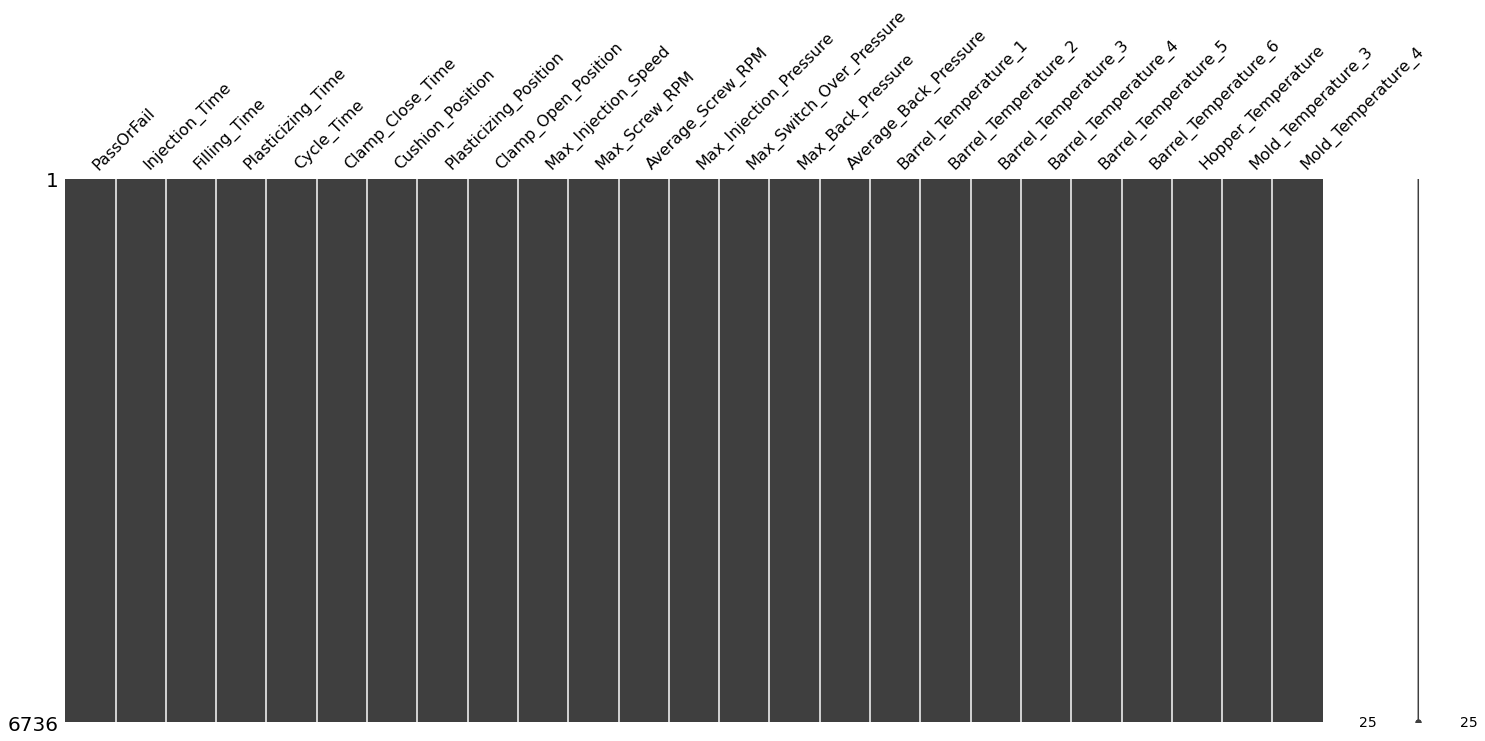

In [192]:
import missingno as msno

msno.matrix(cn7_labeled)

In [194]:
#rg3_labeled null 값 확인 
rg3_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassOrFail                1256 non-null   int64  
 1   Injection_Time            1256 non-null   float64
 2   Filling_Time              1256 non-null   float64
 3   Plasticizing_Time         1256 non-null   float64
 4   Cycle_Time                1256 non-null   float64
 5   Clamp_Close_Time          1256 non-null   float64
 6   Cushion_Position          1256 non-null   float64
 7   Plasticizing_Position     1256 non-null   float64
 8   Clamp_Open_Position       1256 non-null   float64
 9   Max_Injection_Speed       1256 non-null   float64
 10  Max_Screw_RPM             1256 non-null   float64
 11  Average_Screw_RPM         1256 non-null   float64
 12  Max_Injection_Pressure    1256 non-null   float64
 13  Max_Switch_Over_Pressure  1256 non-null   float64
 14  Max_Back

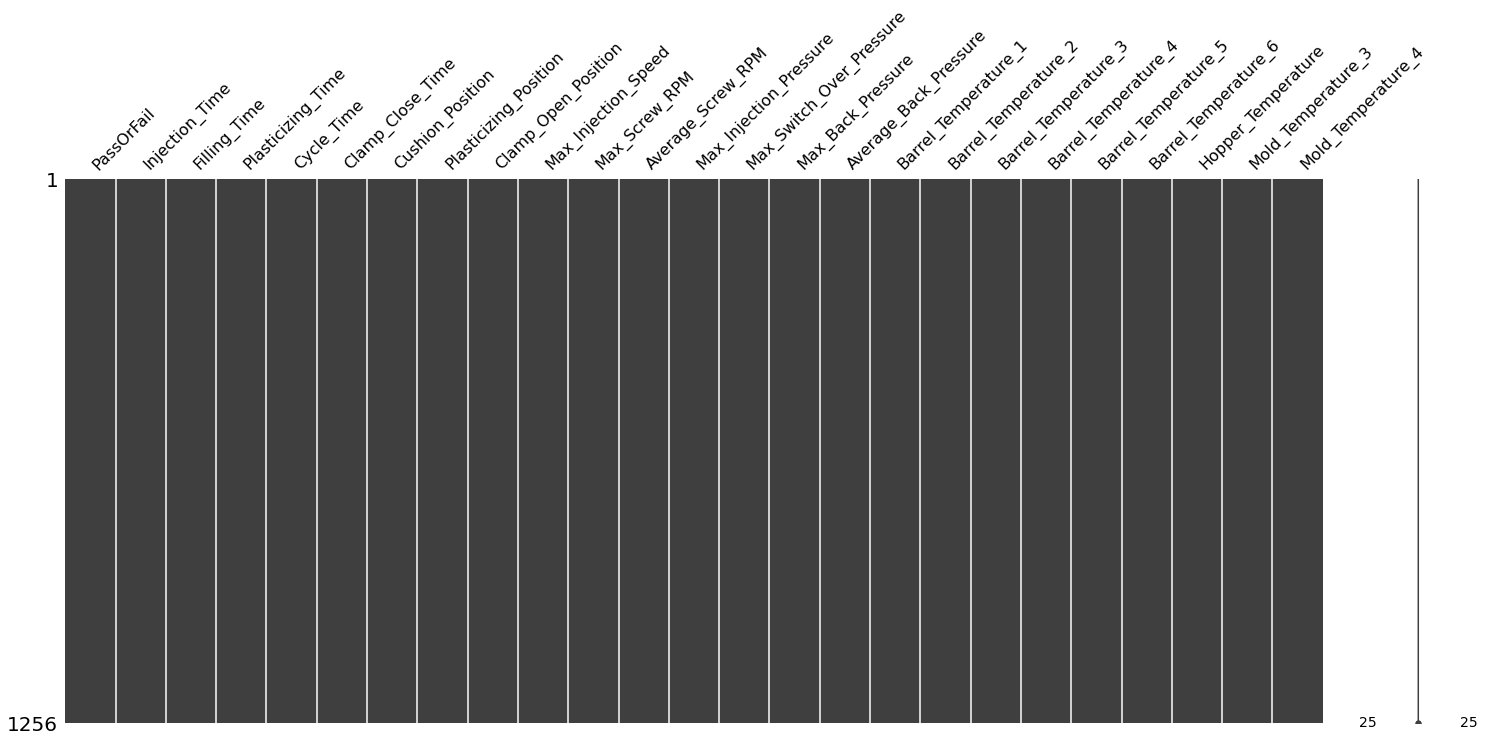

In [199]:
msno.matrix(rg3_labeled)

## ver2 expected purpose
- moldset_labeled.csv 데이터 전처리
  - 종속변수와 상관관계 높은 변수 선정하여 outlier 및 null 값 제거(다 확인 힘드니)
  - 데이터 값이 이상한 변수 삭제
  - 종속변수 label 숫자로 변환


# 그 이외 데이터 잠시 살펴보기

In [18]:
#unlabeled Data info 확인
#변수 null값 및 data type 확인

unlabeled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795315 entries, 0 to 795314
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                795315 non-null  int64  
 1   _id                       795315 non-null  object 
 2   TimeStamp                 795315 non-null  object 
 3   PART_FACT_PLAN_DATE       795315 non-null  object 
 4   PART_FACT_SERIAL          795315 non-null  int64  
 5   PART_NO                   795315 non-null  object 
 6   PART_NAME                 795315 non-null  object 
 7   EQUIP_CD                  795315 non-null  object 
 8   EQUIP_NAME                795315 non-null  object 
 9   ERR_FACT_QTY              795315 non-null  int64  
 10  Injection_Time            795315 non-null  float64
 11  Filling_Time              795315 non-null  float64
 12  Plasticizing_Time         795315 non-null  float64
 13  Cycle_Time                795315 non-null  f

In [20]:
#labeled data 기술 통계 수치 확인
#이상 변수들 탐지
labeled_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2607.0,1303.000000,752.720400,0.000000,651.500000,1303.000000,1954.500000,2606.000000
PART_FACT_SERIAL,2607.0,13.431914,4.572502,9.000000,10.000000,12.000000,14.000000,24.000000
PassOrFail,2607.0,0.019946,0.139843,0.000000,0.000000,0.000000,0.000000,1.000000
Injection_Time,2607.0,5.711105,4.238696,1.050000,1.060000,9.520000,9.550000,13.390000
Filling_Time,2607.0,2.858807,1.756242,0.930000,0.940000,4.410000,4.440000,8.270000
Plasticizing_Time,2607.0,15.139693,2.026422,12.800000,12.920000,16.780001,17.000000,21.100000
Cycle_Time,2607.0,60.542800,1.125377,58.959999,59.520000,59.580002,61.779999,62.360001
Clamp_Close_Time,2607.0,6.978470,0.160223,6.790000,6.800000,7.120000,7.120000,7.180000
Cushion_Position,2607.0,653.797856,0.415763,653.390015,653.409973,653.450012,654.250000,654.289978
Switch_Over_Position,2607.0,1.005462,25.654063,0.000000,0.000000,0.000000,0.000000,655.309998


In [22]:
#unlabeled data 기술 통계 수치 확인
#이상 변수들 탐지
unlabeled_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,795315.0,397657.000000,229587.809007,0.00,198828.50,397657.00,596485.50,795314.00
PART_FACT_SERIAL,795315.0,7.346591,6.070685,1.00,2.00,6.00,10.00,54.00
ERR_FACT_QTY,795315.0,13.862124,26.549459,0.00,1.00,5.00,13.00,353.00
Injection_Time,795315.0,9.454754,5.569126,0.13,5.00,9.52,16.29,29.10
Filling_Time,795315.0,3.897417,1.645200,0.00,2.95,3.35,5.00,29.10
Plasticizing_Time,795315.0,11.230021,7.619902,0.20,2.90,10.95,16.77,468.20
Cycle_Time,795315.0,58.030807,16.916262,0.00,39.10,64.42,67.59,648.39
Clamp_Close_Time,795315.0,5.575053,1.913712,2.11,3.40,6.08,6.72,30.10
Cushion_Position,795315.0,215.040085,296.933993,0.00,11.80,18.20,653.62,655.33
Switch_Over_Position,795315.0,10.884156,19.045073,0.00,0.00,10.00,18.20,655.34


## 2.2 이상 변수 제거
- 기술 통계 수치가 0을 기록하고 있는 변수들 제거. 
- 의미상 필요하지 않은 변수 제거.  

In [35]:
#데이터 간략 확인


#EQUIP_CD 확인
labeled_data.head().T
labeled_data['EQUIP_CD'].unique() #Only S14
unlabeled_data['EQUIP_CD'].unique() #S01,04,06,10,02,11,12,07,13,09,14,15,08 

array(['S01', 'S04', 'S06', 'S10', 'S02', 'S11', 'S12', 'S07', 'S13',
       'S09', 'S14', 'S15', 'S08'], dtype=object)

In [36]:
#Reason 확인
labeled_data['Reason'].value_counts()

None      2555
가스          30
미성형         12
초기허용불량      10
Name: Reason, dtype: int64

In [37]:
#PART_NAME 확인

labeled_data['PART_NAME'].value_counts()

CN7 W/S SIDE MLD'G RH    713
CN7 W/S SIDE MLD'G LH    712
RG3 MOLD'G W/SHLD, LH    591
RG3 MOLD'G W/SHLD, RH    591
Name: PART_NAME, dtype: int64

In [40]:
#EQUIP_NAME

labeled_data['EQUIP_NAME'].value_counts()

650톤-우진2호기    2607
Name: EQUIP_NAME, dtype: int64

In [62]:
#Labeled Drop List _1
#'Unnamed: 0','_id','TimeStamp','PART_FACT_PLAN_DATE' : 분석에 필요하지 않은 데이터라고 판단
#PART_NAME : PART_NO 로 이미 구분 가능하기 때문에 삭제
#EQUIP_CD : labeled_data 의 경우 CD value 가 single 이다.(S14)
#Reason : Unlabeled 된 경우가 많음
#Mold_Temperature Series, Barrel_Temperature_7, Switch_Over_Position: 데이터가 대부분 0인 경우가 많음
#EQUIP_NAME : value 가 single 임

drop_labeled_features = ['Unnamed: 0','_id','TimeStamp','PART_FACT_PLAN_DATE','PART_NAME','EQUIP_CD','Reason','Mold_Temperature_1','Mold_Temperature_2','Mold_Temperature_5','Mold_Temperature_6','Mold_Temperature_7',
                 'Mold_Temperature_8','Mold_Temperature_9','Mold_Temperature_10','Mold_Temperature_11','Mold_Temperature_12','Barrel_Temperature_7','Switch_Over_Position','EQUIP_NAME']

In [63]:
#UnLabeled Drop List
#상기와 비슷

drop_unlabeled_features = ['Unnamed: 0','_id','TimeStamp','PART_FACT_PLAN_DATE','PART_FACT_SERIAL','PART_NAME','EQUIP_NAME','ERR_FACT_QTY',
                           'Mold_Temperature_1','Mold_Temperature_2','Mold_Temperature_5','Mold_Temperature_6','Mold_Temperature_7',
                           'Mold_Temperature_8','Mold_Temperature_9','Mold_Temperature_10','Mold_Temperature_11','Mold_Temperature_12',
                           'Switch_Over_Position','Barrel_Temperature_7','EQUIP_NAME','EQUIP_CD']



In [66]:
labeled_data.drop(drop_labeled_features, axis = 1, inplace = True)

In [67]:
unlabeled_data.drop(drop_unlabeled_features, axis = 1, inplace = True)

In [72]:
labeled_data.head().T
labeled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2607 entries, 0 to 2606
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PART_FACT_SERIAL          2607 non-null   int64  
 1   PART_NO                   2607 non-null   object 
 2   PassOrFail                2607 non-null   int64  
 3   Injection_Time            2607 non-null   float64
 4   Filling_Time              2607 non-null   float64
 5   Plasticizing_Time         2607 non-null   float64
 6   Cycle_Time                2607 non-null   float64
 7   Clamp_Close_Time          2607 non-null   float64
 8   Cushion_Position          2607 non-null   float64
 9   Plasticizing_Position     2607 non-null   float64
 10  Clamp_Open_Position       2607 non-null   float64
 11  Max_Injection_Speed       2607 non-null   float64
 12  Max_Screw_RPM             2607 non-null   float64
 13  Average_Screw_RPM         2607 non-null   float64
 14  Max_Inje

In [73]:
unlabeled_data.head().T
unlabeled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795315 entries, 0 to 795314
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   PART_NO                   795315 non-null  object 
 1   EQUIP_CD                  795315 non-null  object 
 2   Injection_Time            795315 non-null  float64
 3   Filling_Time              795315 non-null  float64
 4   Plasticizing_Time         795315 non-null  float64
 5   Cycle_Time                795315 non-null  float64
 6   Clamp_Close_Time          795315 non-null  float64
 7   Cushion_Position          795315 non-null  float64
 8   Plasticizing_Position     795315 non-null  float64
 9   Clamp_Open_Position       795315 non-null  float64
 10  Max_Injection_Speed       795315 non-null  float64
 11  Max_Screw_RPM             795315 non-null  float64
 12  Average_Screw_RPM         795315 non-null  float64
 13  Max_Injection_Pressure    795315 non-null  f

In [88]:
#Object data 처리
#PART_NO => labeled_data, unlabeled_data => 제품의 모델 코드
#EQUIP_CD => unlabeled_data => 생산한 사출기 호기

#PART_NO

print(labeled_data['PART_NO'].value_counts())
print()
print(unlabeled_data['PART_NO'].value_counts())
print(unlabeled_data['PART_NO'].unique())

86141AA000    713
86131AA000    712
86131T1000    591
86141T1000    591
Name: PART_NO, dtype: int64

87275Q5000    118071
87285Q5000    114977
87293Q5000     68342
86131S8000     40647
86141AA000     27885
               ...  
9163240030        18
YP3320L000        10
87264R1400         7
87274K0000         1
87281K0000         1
Name: PART_NO, Length: 81, dtype: int64
['87285Q5000' '87275Q5000' '87263R1400' '86133J7000' 'TM3050L000'
 'TM3060R000' 'TM1220B003' '87277K0000' '87272K0000' '87282K0000'
 'YP5740B000' 'YP5750B000' '86611K9000' '87277Q5000' 'UM3060R000'
 'UM3050L000' 'ON-SS1210' 'TM1200B003' '87293Q5000' '87272R1400'
 '87282R1400' '87277R1400' 'XG1000F000-1' '87287Q5000' '86134J7000'
 'XG1000R000-1' '9163240005' 'TM1210B003' '87293K0001' '86131S8000'
 'ON-SS1110' '86141J7700' '86141S8000' '9163240004' '86131T6000'
 '87282Q5000' '87272Q5000' '86131G3000' '86132G3000' '9163240003'
 'YP3330R000' '86142J7700' '87264R1400' 'TL3080R000' 'ON-SS1130'
 '86131T1000' '87287K0000' '86141

In [ ]:
labeled_data['PART_NO'] == '86141AA000'

SyntaxError: ignored